# Práctica 1
## Desarrollado por Sara Pérez y Cristian Fernández
## 06 de Octubre de 2017
## Aprendizaje automático, EPS, UAM (Madrid)
## Introducción
La siguiente práctica muestra el estudio previo a una operación de _machine learning_ de los datos relacionados. Para ello se aplican distíntas técnicas que intentan simplificar la tarea de aprendizaje, bien sea simplificando los datos o preprocesandolos. 

Para ello, se ha desarrollado en [Jupyter Notebook](https://www.jupyter.com), una herramienta que permite la generación de resultados a través del lenguaje de programación _python_ en un formato documento, que es el que se presenta.

Esta práctica emula la memoria de una auditoría cuyo cliente final es una empresa que nos ha encargado la realización de dicho estudio de datos.

## Objetivo
El objetivo de este documento es el estudio, simplificación y preprocesamiento de un conjunto de datos de cara al uso de un algoritmo de _machine learning_.

## Trabajo Desarrollado

En este apartado se describe el procesamiento realizado a los datos así como una breve explicación de los métodos aplicados.

### Cargando librerias

In [2]:
#Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt# Read Dataset

%matplotlib inline


### Obteniendo los datos del csv

### Descripcion de las variables

Tenemos una base de datos médica con los resultados de análisis sanguineos de varios pacientes y una clasificación de su estado de salud, 1 para los enfermos y 2 para los sanos. En primer lugar tenemos los datos del paciente, su edad y su género. A continuación se nos dan los resultados del total de bilirrubina y bilirrubina directa, la bilirrubina es un pigmento amarillo que se encuentra en la bilis (liquido generado por el hígado), la bilirrubina total es la suma de la bilirrubina directa o conjugada y la bilirrubina indirecta.<br> Despues se proporciona los valores de la fosfatasa alcalina, que es una enzima que se desplaza a través de el sistema sanguíneo, pero que se acumula más que nada en el hígado, la bilis, riñones y el sistema intestinal, es útil para detectar enfermedades óseas o hepáticas. <br><br>
Después están las transaminasas, la alaninoamino transferasa (ALT o GPT) y la aspartato aminotransferasa (AST o GOT), que son enzimas que se encuentran en el interior de las células de órganos como el hígado, el corazón, los riñones o los músculos, y desempeñan una importante función en el metabolismo. Cuando un análisis de sangre detecta niveles elevados de estas moléculas puede indicar que existe una lesión de las células hepáticas.<br><br>

Las últimas tres variables son las proteinas totales, la albumina y el ratio de albumina y globulina. El examen de proteína total mide la cantidad total de dos clases de proteínas encontradas en la porción líquida de la sangre: albúmina y globulina.<br>
La albúmina es una proteína plasmática cuya función más importante es el mantenimiento de la presión oncótica, es decir  ayuda a impedir que se escape líquido fuera de los vasos sanguíneos,  y la capacidad de transporte de hormonas, medicamentos,etc.<br>
Las globulinas son útiles en la lucha contra las infecciones y mejorar el proceso de coagulación de la sangre. También sirven como portadora de la hormona y el transporte de las hormonas a diferentes partes del cuerpo.<br><br>
Por los componentes analizados podemos concluir que es un perfil hepático para detectar problemas en el hígado.


In [3]:
#Path para linux
path = '../Recursos/indian_liver_patient.csv'

#Path para Windows
#path = '..\Recursos\indian_liver_patient.csv'
dataset = pd.read_csv('../Recursos/indian_liver_patient.csv',delimiter=',',header=0)
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


### Listamos cabeceras de los datos

In [4]:
# Header
header = []
for row in dataset:
    header.append(row)
header

['Age',
 'Gender',
 'Total_Bilirubin',
 'Direct_Bilirubin',
 'Alkaline_Phosphotase',
 'Alamine_Aminotransferase',
 'Aspartate_Aminotransferase',
 'Total_Protiens',
 'Albumin',
 'Albumin_and_Globulin_Ratio',
 'Dataset']

#### Cambiando valores nominales

Como se puede observar desde un primer momento, existe una variable nominal denominada _Gender_ relacionada con el sexo. Para facilitar los cálculos posteriores, vamos a reemplazarla cambiando:
* **Male:** 0
* **Female:** 1

In [5]:
dataset.replace("Male",0, True)
dataset.replace("Female",1,True)
dataset

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1



#### Datos de estadisticos de las variables
En este apartado vamos a desarrollar un breve estudio estadístico para los datos proporcionados. Para ello utilizaremos el método _describe_ del objeto _DataSet_ de la librería **panda**. Este método genéra un cálculo estadístico básico en el que nos describe por cada variable valores tales como la media, la desviación estandar y los percentiles 25%, 50% y 75% respecto al valor máximo.




In [8]:
print(dataset.describe()) #Descripción de los datos

#### Obtenemos contéo de sexo
print('\nPacientes masculinos (0) y femeninos (1):')
print(pd.value_counts(dataset['Gender'].values))
#### Obtenemos contéo de la clase
print('\nPacientes enfermos (1) y sanos (2):')
print(pd.value_counts(dataset['Dataset'].values))


              Age      Gender  Total_Bilirubin  Direct_Bilirubin  \
count  583.000000  583.000000       583.000000        583.000000   
mean    44.746141    0.243568         3.298799          1.486106   
std     16.189833    0.429603         6.209522          2.808498   
min      4.000000    0.000000         0.400000          0.100000   
25%     33.000000    0.000000         0.800000          0.200000   
50%     45.000000    0.000000         1.000000          0.300000   
75%     58.000000    0.000000         2.600000          1.300000   
max     90.000000    1.000000        75.000000         19.700000   

       Alkaline_Phosphotase  Alamine_Aminotransferase  \
count            583.000000                583.000000   
mean             290.576329                 80.713551   
std              242.937989                182.620356   
min               63.000000                 10.000000   
25%              175.500000                 23.000000   
50%              208.000000                 3

Observando estos datos podemos sacar conclusiones tales como:
* Tratamos con un conjunto de 583 pacientes
* Referente a la edad de los pacientes:
  * La edad media de los pacientes es de 44 ± 16 años
  * El paciente más joven tiene la edad de 4 años.
  * El paciente más anciano tiene 90 años.
  * El grueso de los pacientes están entre el percentíl 50 y 75, lo que indica que están por encima de los 45 años.
* Referente al sexo de los pacientes:
  * Tenemos un total de 441 hombres
  * Tenemos un total de 142 mujeres
* De estos pacientes:
  * 416 están enfermos
  * 167 están sanos

### Normalizando variables

Para saber si debemos normalizar algúna variable, debemos ver la distribución que estas siguen. Para ello, podemos realizar un histograma de cada una de las variables y ver gráficamente las variables que parezcan seguir una distribución normal.

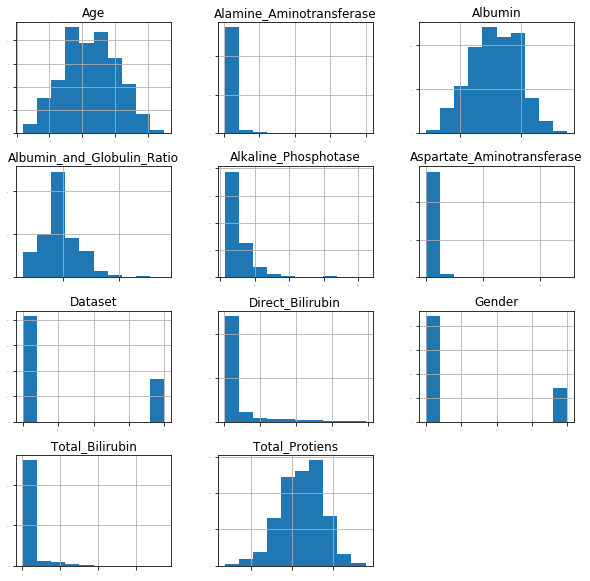

In [6]:
#### Histogram Matrix Plot

plt.figure()
dataset.hist(xlabelsize=0.5, ylabelsize=0.2,figsize=(10,10))
plt.xlabel("Data")
plt.show()

La variables que más o menos siguen está distribución (_Albumin_,_Total&#95;Protiens_) las vamos a normalizar con la normalizacion Z-Score: $$x'=\frac{x-\mu}{\sigma}$$ Aunque la variable _Age_ también parece seguir una distribución normal, por simplicidad y semántica de la variable, no se va a normalizar. Pasa lo mismo con las variables _Genre_ y _Dataset_.

Para el resto de variables vamos a usar la normalización min-max en un intervalo [0-1]:$$x'=\frac{x-min}{max-min}$$

In [7]:
#Definición de funciones auxiliares 

def zScore(var):
    return (var-var.mean())/var.std()
def minMax(var):
    return (var-var.min())/(var.max()-var.min())

dataNorm=dataset.copy()

dataNorm['Albumin']=zScore(dataNorm['Albumin'])
dataNorm['Total_Protiens']=zScore(dataNorm['Total_Protiens'])

dataNorm['Total_Bilirubin']=minMax(dataNorm['Total_Bilirubin'])
dataNorm['Direct_Bilirubin']=minMax(dataNorm['Direct_Bilirubin'])
dataNorm['Alkaline_Phosphotase']=minMax(dataNorm['Alkaline_Phosphotase'])
dataNorm['Alamine_Aminotransferase']=minMax(dataNorm['Alamine_Aminotransferase'])
dataNorm['Aspartate_Aminotransferase']=minMax(dataNorm['Aspartate_Aminotransferase'])
dataNorm['Albumin_and_Globulin_Ratio']=minMax(dataNorm['Albumin_and_Globulin_Ratio'])
dataNorm


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.004021,0.000000,0.060576,0.003015,0.001626,0.291869,0.198798,0.240,1
1,62,0,0.140751,0.275510,0.310699,0.027136,0.018296,0.936762,0.073094,0.176,1
2,62,0,0.092493,0.204082,0.208598,0.025126,0.011791,0.476124,0.198798,0.236,1
3,58,0,0.008043,0.015306,0.058134,0.002010,0.002033,0.291869,0.324502,0.280,1
4,72,0,0.046917,0.096939,0.064485,0.008543,0.009961,0.752507,-0.932539,0.040,1
5,46,0,0.018767,0.030612,0.070835,0.004523,0.000813,1.028889,1.581543,0.400,1
6,26,1,0.006702,0.005102,0.044455,0.003015,0.000407,0.476124,0.450206,0.280,1
7,29,1,0.006702,0.010204,0.067904,0.002010,0.000203,0.199741,0.575910,0.320,1
8,17,0,0.006702,0.010204,0.067904,0.006030,0.001830,0.844634,1.204431,0.360,2
9,55,0,0.004021,0.005102,0.110894,0.021608,0.009758,0.291869,0.324502,0.280,1


A partir de este punto ya tenemos un conjunto de datos normalizado con el que operar.

### Deteccion de outliers

A la hora de tratar cualquier conjunto de datos es común observar valores que parecen que rompen la norma y que se salen de la distribución. En los algoritmos de _machine learninng_, este tipo de valores pueden desfavorecedores pues a tenerlos en cuenta pueden generar problemas y llegar a estados espúreos.

Por ello, debemos intentar localizarlos y tratarlos. No debemos olvidar nunca la semántica de los datos que tratamos. Para poder identificar _outliers_, una buena herramienta son las gráficas de caja:


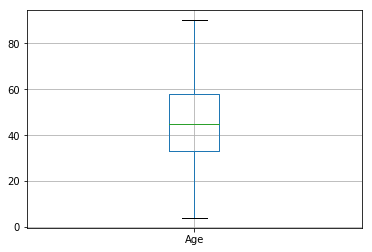

In [8]:
dataset.boxplot(column='Age')

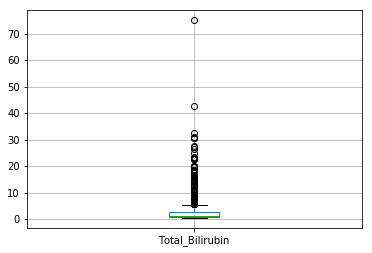

In [9]:
dataset.boxplot(column='Total_Bilirubin')

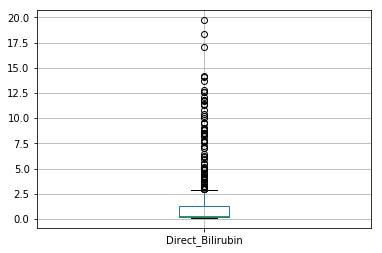

In [10]:
dataset.boxplot(column='Direct_Bilirubin')

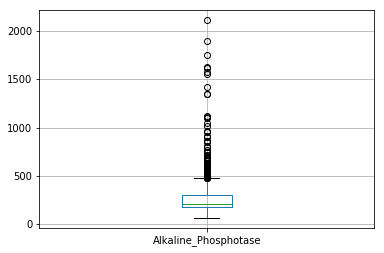

In [11]:
dataset.boxplot(column='Alkaline_Phosphotase')

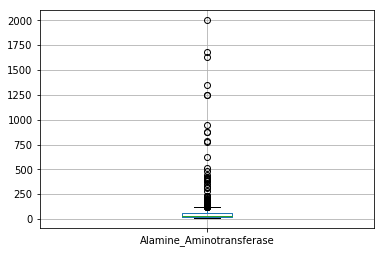

In [12]:
dataset.boxplot(column='Alamine_Aminotransferase')

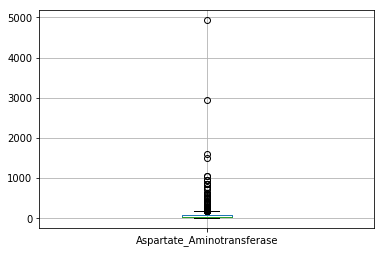

In [13]:
dataset.boxplot(column='Aspartate_Aminotransferase')

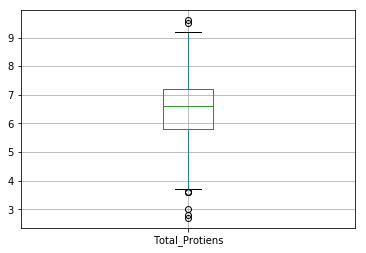

In [14]:
dataset.boxplot(column='Total_Protiens')

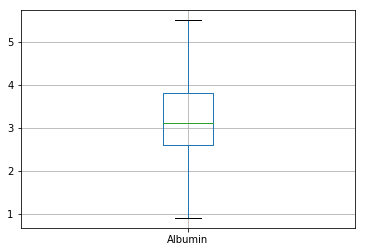

In [15]:
dataset.boxplot(column='Albumin')

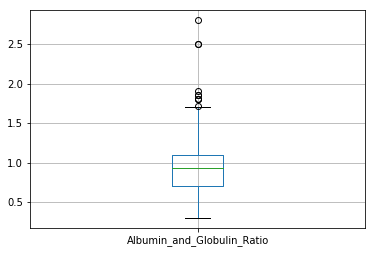

In [16]:
dataset.boxplot(column='Albumin_and_Globulin_Ratio')

Como vemos en los boxplot hay varios _outliers_ en las variables, en concreto algunos muy marcados en la _total bilirubin_, _direct bilirubin_, _alkaline phosphotase_,   _alamine aminotransferase_, _aspartate aminotransferase_ y _albumin and globulin ratio_. Pero al tratarse de **datos médicos** para detectar si alguien está enfermo o no, esos _outliers_ pueden ser útiles para el estudio, por lo que hemos decidido conservarlos.   

### Missing values

Cuando trabajamos con un conjunto amplio de datos, es común que no dispongamos de todos las variables para cada entrada. Debemos localizar estos puntos donde no hay valores (_missing values_) y tratarlos. En ocasiones, el tratar estos datos implica inicializarlos a un valor que no afecte o inclusive eliminar las entradas conflictivas, dependiendo de los datos.


In [17]:
dataset.notnull().all()

Age                            True
Gender                         True
Total_Bilirubin                True
Direct_Bilirubin               True
Alkaline_Phosphotase           True
Alamine_Aminotransferase       True
Aspartate_Aminotransferase     True
Total_Protiens                 True
Albumin                        True
Albumin_and_Globulin_Ratio    False
Dataset                        True
dtype: bool

In [18]:
dataset.loc[dataset['Albumin_and_Globulin_Ratio'].isnull()]



,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
209,45,1,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,0,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,1,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,0,1.3,0.6,106,25,54,8.5,4.8,NaN,2


Solo hay una variable con _missing values_: _Albumin and globulin ratio_, y solo en cuatro filas. Al tener una base de datos grande y pocos _missing values_ hemos decido eliminarlos.

In [19]:
dataset.dropna()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,0,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,0,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,0,0.7,0.2,290,53,58,6.8,3.4,1.00,1


A partir de este punto tenemos los datos listos para empezar hacer un estudio semántico de los mismos sin que las anomalías de los mismos nos puedan interferir.

### Correlación entre las variables

El primer estudio que vamos a hacer con los datos va a ser evaluar como de relacionados están unos con otros. Esto nos permitirá evaluar cuales de los atributos pueden ser determinantes para el problema que plantea estos datos.

Para ello, generaremos la matriz de correlación lineal gracias a la función _corr()_ del objeto dataset de **panda**:

In [20]:
correlation=dataset.corr() #Correlation Matrix
correlation

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,0.163131


Si representamos esta matriz como un grafico donde podamos verlo más visualmente:

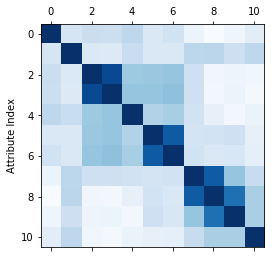

In [21]:
# Display the correlation matrix with a specified figure number and a bluescale
# colormap
plt.figure()
plt.matshow(correlation, fignum=1, cmap=plt.cm.Blues)
plt.ylabel("Attribute Index")
plt.show()

/home/cristian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """


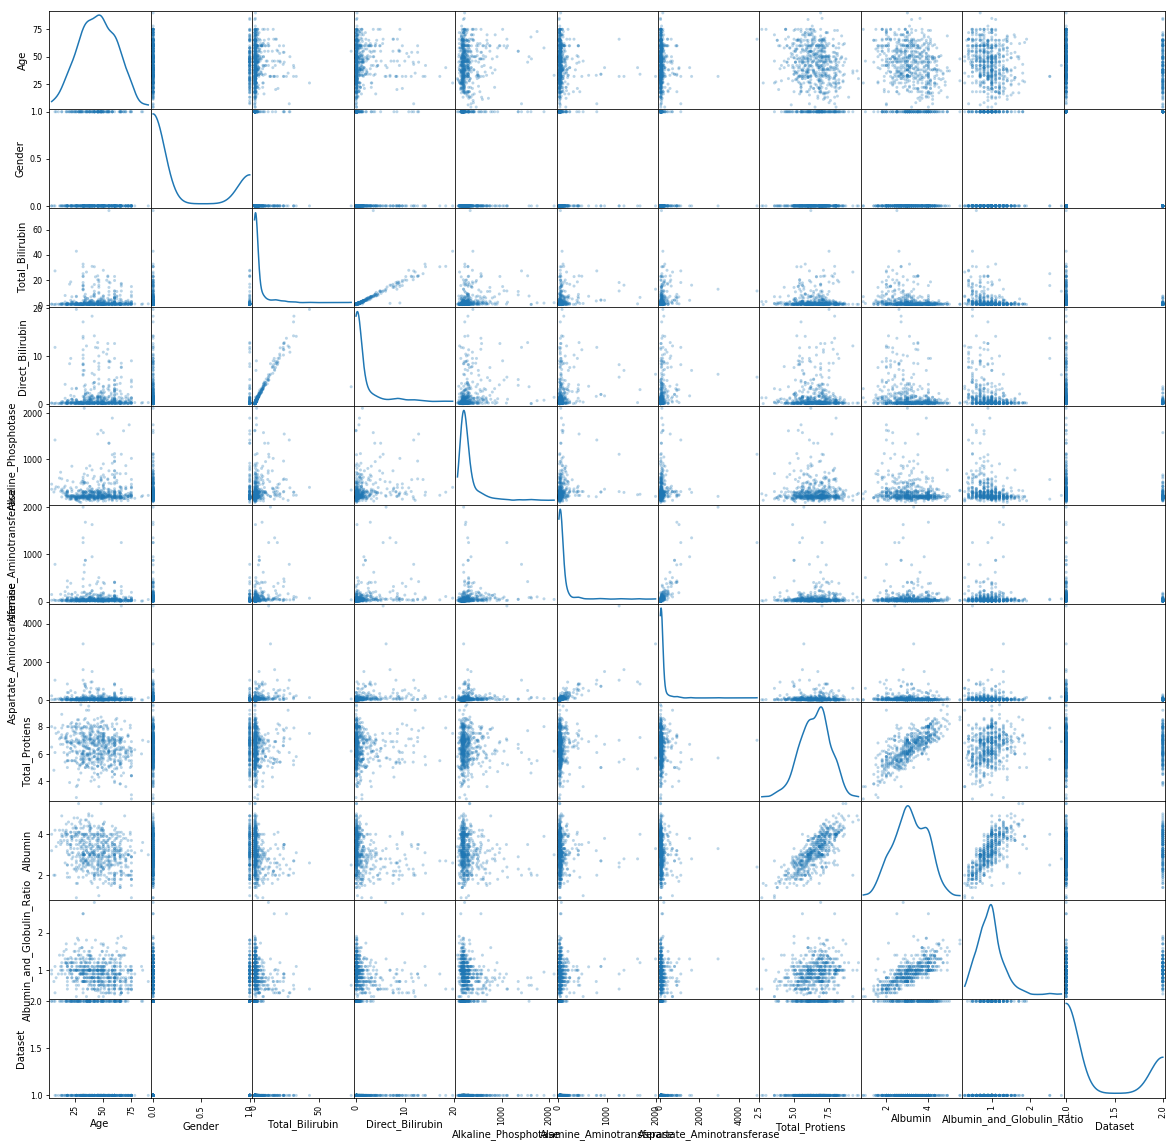

In [22]:
#### Scatter Matrix Plot

plt.figure()
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dataset, alpha=0.3, figsize=(20, 20), diagonal='kde')
plt.show()

Como conclusión a los datos obtenidos previamnte, podemos sacar las siguientes conclusiones:

* Hay alta correlación entre la bilirrubina total y la bilirrubina directa, cosa que esperamos porque bilirrubina total=bilirrubina directa + bilirrubina indirecta, tal y como se explicó previamente.

* Hay alta correlación entre albumina y el total proteinas ya que el total proteinas es la suma de la albumina y la gobulina.

* Hay alta correlación entre la albumina y el ratio de albumina y gobulina

* Hay alta correlación entre las dos  transaminasas, la alaninoamino transferasa y la aspartato aminotransferasa

* Aun a pesar de los datos previos, no hay una gran correlación entre las variables y la clase. La correlación más alta con la clase es la que hay con la bilirrubina directa. Con lo cual **tampoco pareciera que tuviéramos falsos predictores**.



### Separación de variables

Dado el conjunto de datos y que parece que están detectando un fallo hepático, sería planteable pensar en que las diferencias entre hombres y mujeres pudieran ser determinantes y por tanto pudiera estar justificado la separacion de los datos por sexo, dejando los datos en dos subconjuntos preparados para el siguiente paso que sería el algoritmo de aprendizaje.

In [23]:
for df_gender in dataset.groupby('Gender'):
    print(df_gender)


(0,      Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
1     62       0             10.9               5.5                   699   
2     62       0              7.3               4.1                   490   
3     58       0              1.0               0.4                   182   
4     72       0              3.9               2.0                   195   
5     46       0              1.8               0.7                   208   
8     17       0              0.9               0.3                   202   
9     55       0              0.7               0.2                   290   
10    57       0              0.6               0.1                   210   
11    72       0              2.7               1.3                   260   
12    64       0              0.9               0.3                   310   
14    61       0              0.7               0.2                   145   
15    25       0              0.6               0.1                   18

### Variables sintéticas

Por último, sería conveniente estudiar la necesidad de crear variables sintéticas en función de las variables actuales. El uso de estas variables permite que los algorítmos de _machine learning_ funcionen mejor al tratar sobre una variable que está estudiada y sabemos que proporciona información determinante.

Evaluando los datos, podría ser interesante una variable para las proteinas totales y la bilirrubina total pero ya que  dichas variables ya están en el conjunto de datos no hay necesidad de generar variables sintéticas.

## Conclusiones

Los algoritmos de _machine learning_ son unas herramientass increíbles que nos permiten resolver problemas que de otra manera sería imposible de resolver. Como todo, tienen un inconveniente: los datos a utilizar y su complejidad. Por eso, un paso previo e importantísimo es el tratamiento de dichos datos.

En esta práctica hemos emulado una auditoría que nos ha permitido profundizar en el estudio y manejo de un conjunto de datos en el que en principio no teníamos información relevante sobre los mismos. Junto con los conocimientos impartidos en las clases, hemos sido capaces de interpretar y analizar un conjunto de datos relacionados con una enfermedad hepática lo que nos ha permitido profundizar y afianzar dichos conocimientos.

Hemos visto que la mayoría de los atributos se correlaciónan por igual. Esto indica que la información que porporcionan por separado relevante para la clasificación. También hemos observado que la edad y el sexo son parámetros poco determinantes dado el caso que tratamos aunque pudiera ser interesante la división por dichos datos. Esta división está mas orientada a un estudio estadístico que a una aplicación directa. 

Como curiosidad comentar que hemos comentado este conjunto de datos y nuestras conclusiones con un equipo médico (amigos de uno de los integrantes) que nos ha confirmado que los datos relevantes son todos menos la edad y el sexo pues no suelen ser determinantes para las enfermedades hepáticas comunes.